In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv

from tensorflow import keras
from keras.preprocessing import image

In [3]:
MODEL_WEIGHTS = 'model_weights_20200605035425.h5'

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD


# Define CNN model
def create_model():
	model = Sequential()
 
    # Convolutional stack
	model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(rate=0.2))
 
	model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))

	model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(rate=0.2))
 
    # Fully-connected stage
	model.add(Flatten())
	model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(units=1, activation='sigmoid'))
	
    # Model compiling
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 
	return model

In [5]:
model = create_model()

model.load_weights(f"models/{MODEL_WEIGHTS}")

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)      

In [22]:
IMG_HEIGHT, IMG_WIDTH = (200, 200)

def load_image(img_path):

    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    
    # (height, width, channels)
    img_tensor = image.img_to_array(img)                    

    # (1, height, width, channels), add a dimension because the model expects this shape:
    # (batch_size, height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         

    # imshow expects values in the range [0, 1]
    img_tensor /= 255.                                     

    return img_tensor


def classify(img_path):
    # Load a single image
    new_image = load_image(img_path)

    # Check prediction
    pred = model.predict(new_image)

    prob = pred[0][0]

    if prob > 0.5:
        print(f'Likely to be a DOG | Probability of {(100*prob):.2f}%')
    else:
        print(f'Likely to be a CAT | Probability of {(100*(1-prob)):.2f}%')


def show_image(img_path):
    img = cv.imread(img_path)
    
    # Convert to RGB
    b,g,r = cv.split(img)           # get b, g, r
    rgb_img = cv.merge([r,g,b])

    plt.figure(figsize=(12, 6))
    plt.imshow(rgb_img)

Likely to be a CAT | Probability of 90.34%


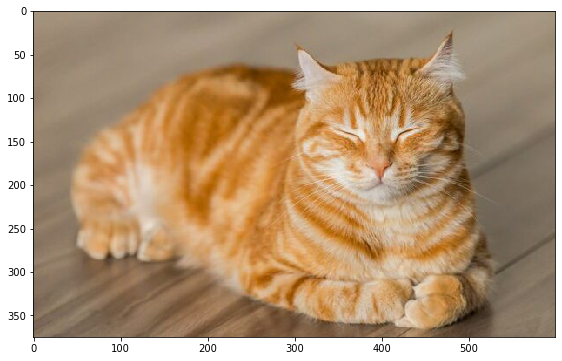

In [24]:
# Image path
PHOTO = 'img_probe/cat1.jpg'    # cat
#PHOTO = 'img_probe/dog.2004.jpg'    # dog

classify(PHOTO)
show_image(PHOTO)